In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
# rcParams['figure.figsize'] = 12, 4
from scipy import stats
import math


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn import preprocessing

/home/data/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/data/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_excel('data_accidentForPapaer_17.11.13.xlsx')

In [3]:
data = data[data['路面附着系数'].isnull()]
print(len(data))

196169


In [4]:
nan_columns = {}
length_data = len(data)
for i in range(len(data.columns)): 
    odds = sum(data[data.columns[i]].isnull())/length_data
    nan_columns[data.columns[i]] = odds

j = 0
for i in nan_columns:
    print(i+' : '+str(nan_columns[i]),end='  ')
    j+=1
    if j==4:
        j=0
        print()

中央隔离设施 : 0.968287547982  是否节假日 : 0.187420030688  是否白天 : 0.187420030688  事故地点 : 0.0  
事故多发点段 : 0.0688946775484  事故类型 : 0.0  交通信号方式（控制） : 0.962675040399  交通标志标线完善 : 0.0  
公路行政等级 : 0.706105449893  公里数 : 0.0903710576085  其他交通安全设施不全 : 0.0686754787963  单向路宽 : 0.99287858938  
双向路宽 : 0.997522544337  在道路横断面位置 : 0.962675040399  地形 : 0.962705626271  天气 : 0.0  
所辖乡镇 : 5.60740993735e-05  星期 : 0.0  是否运载危险物品 : 0.0  照明条件 : 0.962675040399  
能见度 : 0.963159316712  行政区划 : 0.0  路侧防护设施类型 : 0.962914629733  路口路段类型 : 0.962720919207  
路号 : 0.0903659599631  路表情况 : 0.962675040399  路面状况 : 0.962675040399  路面结构 : 0.962710723917  
路面附着系数 : 1.0  道路安全属性 : 0.965840678191  道路安全隐患督办等级 : 0.97537837273  道路物理隔离 : 0.962715821562  
道路类型 : 0.0903914481901  道路线型 : 0.962705626271  长下坡路段 : 0.0  

In [5]:
data = data[data['是否节假日'].notnull()]
print(len(data))

159403


In [52]:
nan_columns = {}
length_data = len(data)
for i in range(len(data.columns)): 
    odds = sum(data[data.columns[i]].isnull())/length_data
    nan_columns[data.columns[i]] = odds

j = 0
for i in nan_columns:
    print(i+' : '+str(nan_columns[i]),end='  ')
    j+=1
    if j==4:
        j=0
        print()

中央隔离设施 : 0.972516201075  是否节假日 : 0.0  是否白天 : 0.0  事故地点 : 0.0  
事故多发点段 : 0.0775644122131  事故类型 : 0.0  交通信号方式（控制） : 0.966989328934  交通标志标线完善 : 0.0  
公路行政等级 : 0.690827650672  公里数 : 0.0865479319712  其他交通安全设施不全 : 0.0775393185825  单向路宽 : 0.9927855812  
双向路宽 : 0.997578464646  在道路横断面位置 : 0.966989328934  地形 : 0.967014422564  天气 : 0.0  
所辖乡镇 : 5.64606688707e-05  星期 : 0.0  是否运载危险物品 : 0.0  照明条件 : 0.966989328934  
能见度 : 0.967428467469  行政区划 : 0.0  路侧防护设施类型 : 0.967177531163  路口路段类型 : 0.967020695972  
路号 : 0.0865416585635  路表情况 : 0.966989328934  路面状况 : 0.966989328934  路面结构 : 0.967020695972  
路面附着系数 : 1.0  道路安全属性 : 0.969944103938  道路安全隐患督办等级 : 0.976932680062  道路物理隔离 : 0.967026969379  
道路类型 : 0.0865730256018  道路线型 : 0.967014422564  长下坡路段 : 0.0  

In [6]:
data = data[data['事故多发点段'].notnull()&data['公里数'].notnull()&data['其他交通安全设施不全'].notnull()\
           &data['所辖乡镇'].notnull()&data['路号'].notnull()&data['道路类型'].notnull()]

In [7]:
data.drop(['中央隔离设施','交通信号方式（控制）','在道路横断面位置','地形','照明条件','能见度',\
           '路表情况','路面状况','路面结构','路面附着系数','道路安全属性','道路安全隐患督办等级','道路物理隔离',\
          '道路线型'], axis=1,inplace=True)
data.drop(['星期','单向路宽','双向路宽'], axis=1,inplace=True)
data.drop(['路侧防护设施类型','路口路段类型'], axis=1,inplace=True)

In [8]:
nan_columns = {}
length_data = len(data)
for i in range(len(data.columns)): 
    odds = sum(data[data.columns[i]].isnull())/length_data
    nan_columns[data.columns[i]] = odds

j = 0
for i in nan_columns:
    print(i+' : '+str(nan_columns[i]),end='  ')
    j+=1
    if j==4:
        j=0
        print()

是否节假日 : 0.0  是否白天 : 0.0  事故地点 : 0.0  事故多发点段 : 0.0  
事故类型 : 0.0  交通标志标线完善 : 0.0  公路行政等级 : 0.666701694864  公里数 : 0.0  
其他交通安全设施不全 : 0.0  天气 : 0.0  所辖乡镇 : 0.0  是否运载危险物品 : 0.0  
行政区划 : 0.0  路号 : 0.0  道路类型 : 0.0  长下坡路段 : 0.0  


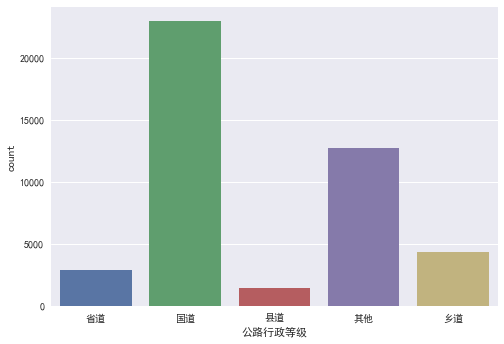

In [9]:
sns.countplot(data['公路行政等级'])

# 1.删除公路行政等级为空的行

In [10]:
data_roadGrade_notNull = data[data['公路行政等级'].notnull()]
print(len(data_roadGrade_notNull))

44404


In [11]:
print(data_roadGrade_notNull['事故地点'])
data_roadGrade_notNull.drop(['事故地点'],axis=1,inplace=True)

35165                   南坪快速东行坂雪岗入口路段
35167                      机荷荷坳收费站往龙岗
35196                           横岗坳背路
35198                        爱联B区十巷十号
35199                    平湖街道白泥坑宝利路3号
35206                 布吉街道布龙路中海怡翠花园路段
35207                    布吉甘坑同富裕工业园路段
35208                   布吉街道吉华路中兴路口路段
35209                          西乡华侨新村
35210                         湖北工业区路口
35214                         机荷东行盐排段
35215              大浪街道三合股份合作公司大楼门口路段
35217            光明新区公明街道田寮村塘口第七工业区路口
35218                     107国道西城工业区段
35219               光明新区公明街道松白路交通执法路口
35241                       梅观高速北行观澜段
35243                    南坪快线坂雪岗段东行匝道
35244                     龙大高速松岗收费站出口
35246                            机荷高速
35247                    龙大高速松罗田往松岗路段
35248                      机荷高速东行排榜立交
35252                        南坪西行塘朗山段
35256               光明新区光明街道光侨路与八号路路口
35262                 光明新区凤新路新健兴工业园路段
35275                   布吉街道布龙路丽湖花园路段
35278                        龙岗大道布吉海关
35279       

/home/data/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## 1.1 预测

In [12]:
#生成训练集和测试集
columnsToNum = list(data_roadGrade_notNull.columns)

data_roadGrade_notNull_toNum = pd.DataFrame()
for i in columnsToNum:
    data_roadGrade_notNull_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_roadGrade_notNull[i])

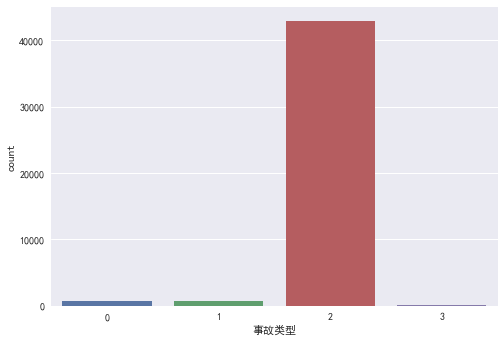

In [18]:
sns.countplot(data_roadGrade_notNull_toNum['事故类型'])

In [19]:
target = '事故类型'

In [23]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):  
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 4
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors],dtrain[target],eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy(Predict compare Label) : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
#     print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Label'], dtrain_predprob))
    cvresult = pd.DataFrame(cvresult)
    print("Accuracy : %.4g" % (1-cvresult.iloc[-1][0]))
    print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
    print(cvresult.iloc[-1][0:2])
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

Will train until cv error hasn't decreased in 50 rounds.
/home/data/anaconda/lib/python3.6/site-packages/xgboost-0.4-py3.6.egg/xgboost/training.py:272: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  idset = [randidx[(i * kstep): min(len(randidx), (i + 1) * kstep)] for i in range(nfold)]
Stopping. Best iteration:
[390] cv-mean:0.022633	cv-std:0.002340247251894551
/home/data/anaconda/lib/python3.6/site-packages/xgboost-0.4-py3.6.egg/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)



Model Report
Accuracy(Predict compare Label) : 0.9854
Accuracy : 0.9774
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean    0.022633
test-merror-std     0.002340
Name: 390, dtype: float64


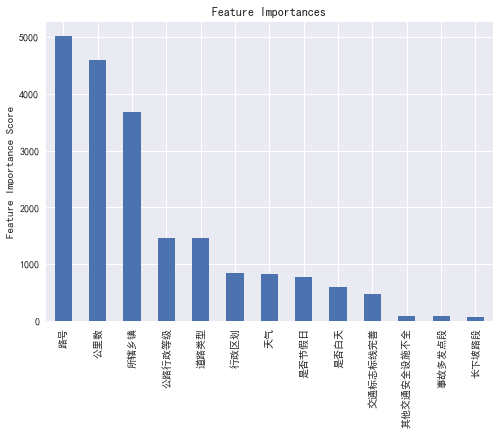

In [24]:
#Choose all predictors except target & IDcols
predictors = [x for x in data_roadGrade_notNull_toNum.columns if x not in [target]]
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=0,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.7,
    #  reg_alpha=0.005,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, data_roadGrade_notNull_toNum, predictors)

In [ ]:
#删除大量简易程序事故，查看预测准确度

# 2.删除公路行政等级特征